In [347]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [348]:
team_win_pct_2024 = {
    'Nyk': 0.633,
    'Bos': 0.747,
    'Cle': 0.797,
    'Ind': 0.608,
    'Mil': 0.570,
    'Det': 0.544,
    'Orl': 0.494,
    'Atl': 0.468,
    'Chi': 0.456,
    'Mia': 0.456,
    'Tor': 0.367,
    'Bro': 0.329,
    'Phi': 0.291,
    'Cha': 0.241,
    'Was': 0.215,
    
    'Okc': 0.823,
    'Hou': 0.658,
    'Lal': 0.608,
    'Lac': 0.595,
    'Den': 0.595,
    'Gol': 0.595,
    'Min': 0.582,
    'Mem': 0.595,
    'Dal': 0.481,
    'Sac': 0.494,
    'Pho': 0.443,
    'Por': 0.443,
    'San': 0.405,
    'Nor': 0.266,
    'Uta': 0.203,
}
team_win_pct_2023 = {
    'Nyk': 0.610,
    'Bos': 0.780,
    'Cle': 0.585,
    'Ind': 0.573,
    'Mil': 0.598,
    'Det': 0.171,
    'Orl': 0.573,
    'Atl': 0.439,
    'Chi': 0.476,
    'Mia': 0.561,
    'Tor': 0.305,
    'Bro': 0.390,
    'Phi': 0.573,
    'Cha': 0.256,
    'Was': 0.183,
    
    'Okc': 0.695,
    'Hou': 0.500,
    'Lal': 0.573,
    'Lac': 0.622,
    'Den': 0.695,
    'Gol': 0.561,
    'Min': 0.683,
    'Mem': 0.329,
    'Dal': 0.610,
    'Sac': 0.561,
    'Pho': 0.598,
    'Por': 0.256,
    'San': 0.268,
    'Nor': 0.598,
    'Uta': 0.378,
}
team_win_pct_2022 = {
    'Nyk': 0.573,
    'Bos': 0.695,
    'Cle': 0.622,
    'Ind': 0.427,
    'Mil': 0.707,
    'Det': 0.207,
    'Orl': 0.415,
    'Atl': 0.500,
    'Chi': 0.488,
    'Mia': 0.537,
    'Tor': 0.500,
    'Bro': 0.549,
    'Phi': 0.659,
    'Cha': 0.329,
    'Was': 0.427,
    
    'Okc': 0.488,
    'Hou': 0.268,
    'Lal': 0.524,
    'Lac': 0.537,
    'Den': 0.646,
    'Gol': 0.537,
    'Min': 0.512,
    'Mem': 0.622,
    'Dal': 0.463,
    'Sac': 0.585,
    'Pho': 0.549,
    'Por': 0.402,
    'San': 0.268,
    'Nor': 0.512,
    'Uta': 0.451,
}

players_2022 = pd.read_csv('2022.csv')
players_2023 = pd.read_csv('2023.csv')
players_2024 = pd.read_csv('2024.csv')

# Drop the 'Temp' column from each DataFrame in place
players_2022.drop(columns=['Temp'], inplace=True, errors='ignore')
players_2023.drop(columns=['Temp'], inplace=True, errors='ignore')
players_2024.drop(columns=['Temp'], inplace=True, errors='ignore')

# Save the updated DataFrames back to the same files
players_2022.to_csv('2022.csv', index=False)
players_2023.to_csv('2023.csv', index=False)
players_2024.to_csv('2024.csv', index=False)

player_files = ['2022.csv', '2023.csv', '2024.csv']

# Loop through each player file
for player_file in player_files:
    # Load player data
    players = pd.read_csv(player_file)
    # Get correct year correlation
    if player_file == '2022.csv':
        win_pct = team_win_pct_2022
    elif player_file == '2023.csv':
        win_pct = team_win_pct_2023
    else:
        win_pct = team_win_pct_2024

    # Map win percentage to teams
    players['win'] = players['TEAM'].map(win_pct)

    # Save the updated player data with the 'win' column
    players.to_csv(f'{player_file}', index=False)

In [349]:
# Get all CSV files
csv_files = glob.glob('./*.csv')

# Read the first file with header
df_main = pd.read_csv(csv_files[0])

# Read through data sets, dropping empty datapoitns
other_dfs = []
for f in csv_files[1:]:
    df = pd.read_csv(f, header=None, skiprows=1, names=df_main.columns)
    df = df.dropna(how='all', axis=1)
    df = df.dropna(how='all')
    other_dfs.append(df)

#Combine data sets
df_combined = pd.concat([df_main] + other_dfs, ignore_index=True)

#Only 600 players
df_combined = df_combined.head(600)
#Save to CSV
df_combined.to_csv('combined_clean.csv', index=False)

In [350]:
#Read df into pandas
df = pd.read_csv('combined_clean.csv')
#Drop the rank column as its irrelevant
df = df.drop(columns='RANK')
df= df.drop(columns="AGE")


In [351]:
#Data cleaning
#There was error in the input of games played for 2023. We will clean
#the columns in the other two years, sorting out players with <20 games
#and then delete the column fully

mask = (df['GP']<20) & ~df.index.to_series().between(200,401)

df_cleaned = df[~mask]
df = df_cleaned
#Drop it after taken into account
df = df.drop(columns="GP")

#Players that play more than half the game
df= df[df['MPG'] >= 24]

#Players that have almost no impact are disregarded
df = df[df['USG']>= 15]

#Remove players with perfect 2 point fg percentage
df = df[(df['2PP'] != 1) & (df['3PP'] != 1) & (df['eFG'] != 1)]

print(df.shape[0])





386


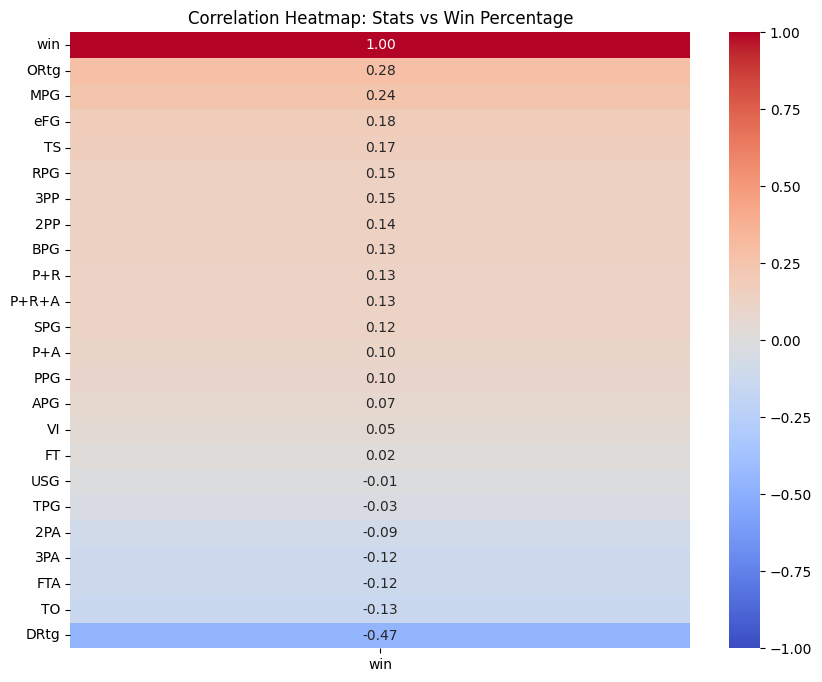

In [352]:
#Get numeric columns
numeric = df.select_dtypes(include = ['number']).columns

#Create correlations to win percentagle
correlations = df[numeric].corr(method='spearman')['win'].sort_values(ascending=False).to_frame()


# Plot a heatmap showing the correlation of each stat with 'win'
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Heatmap: Stats vs Win Percentage")
plt.show()

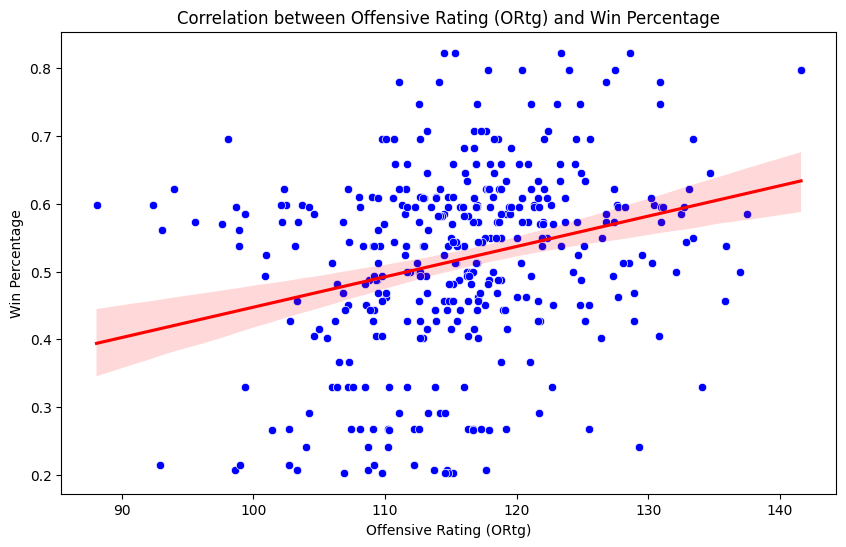

In [353]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ORtg', y='win', color='blue')

# Regression Line
sns.regplot(data=df, x='ORtg', y='win', scatter=False, color='red', line_kws={"color": "red"})

# Add labels and title
plt.title('Correlation between Offensive Rating (ORtg) and Win Percentage')
plt.xlabel('Offensive Rating (ORtg)')
plt.ylabel('Win Percentage')
plt.show()

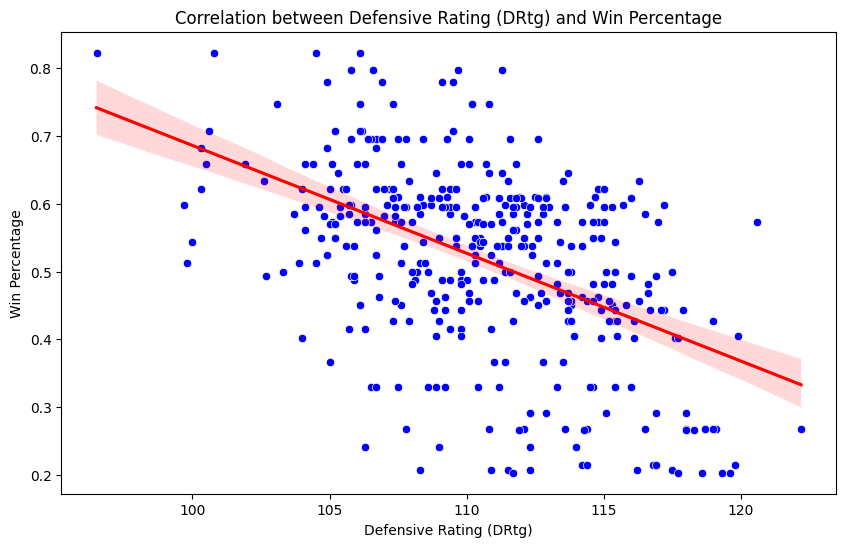

In [354]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='DRtg', y='win', color='blue')

# Regression Line
sns.regplot(data=df, x='DRtg', y='win', scatter=False, color='red', line_kws={"color": "red"})

# Add labels and title
plt.title('Correlation between Defensive Rating (DRtg) and Win Percentage')
plt.xlabel('Defensive Rating (DRtg)')
plt.ylabel('Win Percentage')
plt.show()

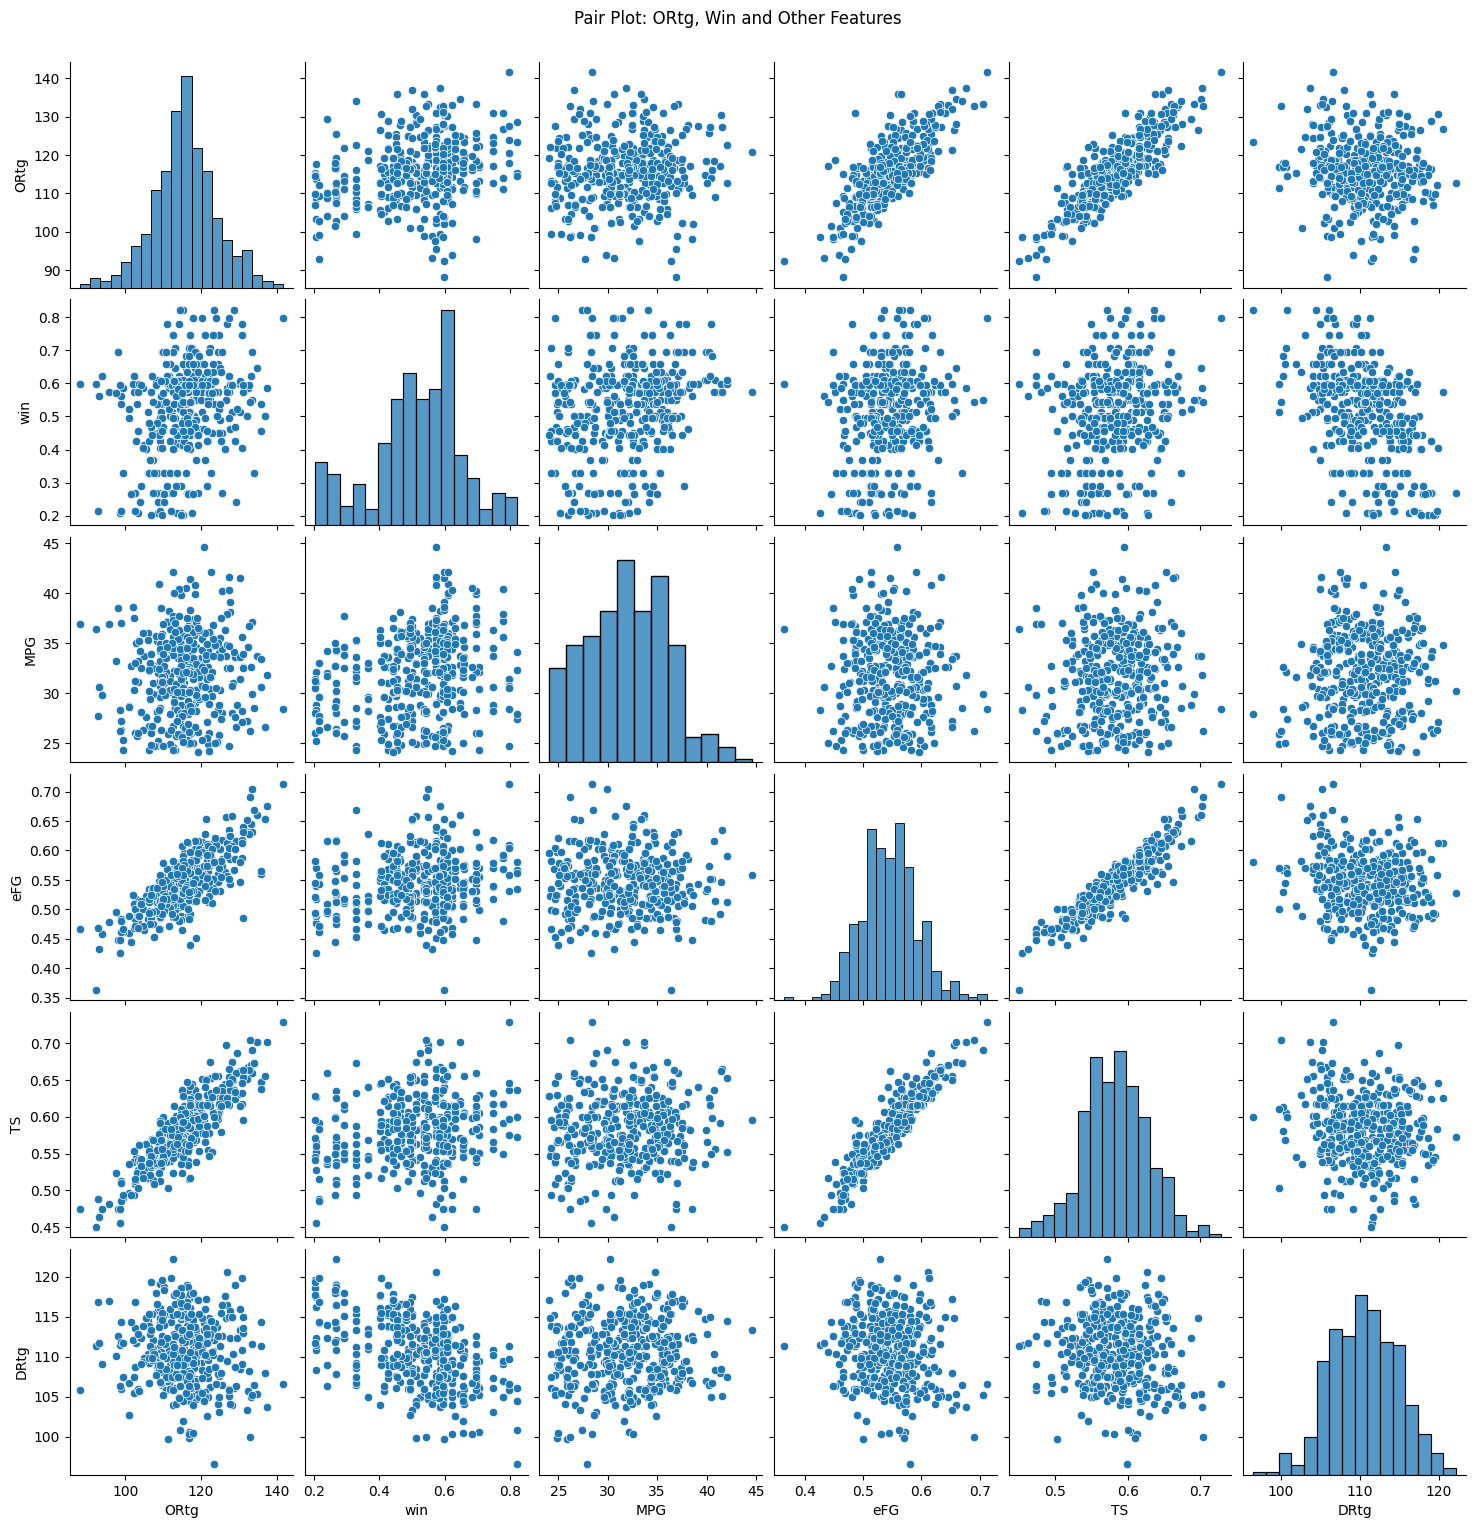

In [355]:
sns.pairplot(df[['ORtg', 'win', 'MPG', 'eFG', 'TS','DRtg']])  # Choose relevant columns
plt.suptitle('Pair Plot: ORtg, Win and Other Features', y=1.02)
plt.show()

In [356]:
correlations['abs_corr'] = correlations['win'].abs()

# Normalize to get weights as DRtg is negative
total_corr = correlations['abs_corr'].sum()
correlations['weight'] = correlations['abs_corr'] / total_corr


df['composite_score'] = 0

# Multiply each player's stat by the corresponding weight and sum it
for column in numeric:
    df['composite_score'] += df[column] * correlations.loc[column, 'weight']

# Display the players with their composite scores
print(df[['NAME', 'composite_score']].head())
most_effective_player = df.sort_values(by='composite_score', ascending=False).iloc[0]
print()
print(f"The most effective player is {most_effective_player['NAME']} with a composite score of {most_effective_player['composite_score']}")

                      NAME  composite_score
0              Joel Embiid        82.074214
1              Luka Doncic        85.017833
2           Damian Lillard        77.055727
3  Shai Gilgeous-Alexander        82.060529
4    Giannis Antetokounmpo        79.885717

The most effective player is Shai Gilgeous-Alexander with a composite score of 86.8977685770319


In [359]:
# Features (all numeric columns) and target ('win')
numeric_features = df.select_dtypes(include=['number']).columns
features = df[numeric_features].drop(columns=['win'])  # Exclude 'win' from features
target = 'win'

# Split data into training and testing sets
X = features
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train the regression model
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)

# Calculate and print RMSE (Root Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

cross_val = cross_val_score(model,X,y,cv=5,scoring = 'neg_mean_squared_error')

cross_val_rmse = (-cross_val)**0.5

print(f"Cross-validation RMSE scores: {cross_val_rmse}")
print(f"Average RMSE: {cross_val_rmse.mean()}")
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to view feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top features that are most important for predicting win percentage
print(importance_df)


Root Mean Squared Error: 0.09161874463902443
Cross-validation RMSE scores: [0.09364476 0.11849385 0.14220191 0.11845903 0.1144202 ]
Average RMSE: 0.11744394971896735
            Feature  Importance
22             DRtg    0.294024
21             ORtg    0.110166
0               MPG    0.064559
8               3PP    0.049914
3               FTA    0.047448
2                TO    0.040969
4                FT    0.038611
7               3PA    0.038139
12              RPG    0.036796
5               2PA    0.028071
13              APG    0.024666
6               2PP    0.023506
23  composite_score    0.023458
10               TS    0.021589
9               eFG    0.020154
14              SPG    0.019546
15              BPG    0.019049
1               USG    0.018180
20               VI    0.017602
18              P+A    0.015307
11              PPG    0.013259
17              P+R    0.013132
16              TPG    0.011304
19            P+R+A    0.010550
